In [ ]:
# Instructions for submission

# 1. Rename this file to groupXX_PPGHR.ipynb where XX is your group number as visible in the Google spreadsheet
# 2. State the team members (e-mail, legi):
# example@student.ethz.ch, XX-YYY-ZZZ
# TO BE FILLED
# TO BE FILLED
# 3. Kaggle team name: TO BE FILLED
# 4. Upload this file in a zipped folder together with your final predictions to the provided Polybox link. See the Submission section in the PDF for more details.

In [1]:
# Import necessary libraries
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
sampling_rate = 128  # Hz

# Load data item containing the PPG, HR, and IMU signals from all phases
data = np.load('mhealth24_data_public.npy', allow_pickle=True).item() # now it is a dict

print('Keys for data:', data.keys())

# Example to extract the data from phase 0
phase0_data = data['phase 0']
print('Keys for phase 0:', phase0_data.keys())

# Get the individual signals from phase 0
ppg_phase0 = phase0_data['PPG wrist']
ref_hr_phase0 = phase0_data['ground truth HR']  # only available for phase 0, 2, and 4 (training data)
#IMU_X_phase0 = phase0_data['IMU X wrist']
#IMU_Y_phase0 = phase0_data['IMU Y wrist']
#IMU_Z_phase0 = phase0_data['IMU Z wrist']

Keys for data: dict_keys(['phase 0', 'phase 1', 'phase 2', 'phase 3', 'phase 4', 'phase 5'])
Keys for phase 0: dict_keys(['ground truth HR', 'PPG wrist', 'IMU X wrist', 'IMU Y wrist', 'IMU Z wrist'])


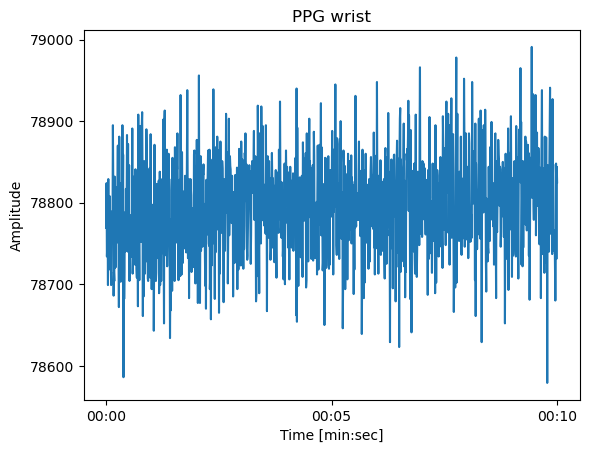

In [4]:
# Function to plot any signal with time on the x-axis
def plot_signal(signal, title, ylabel, sampling_rate=128):
    x = np.linspace(0, len(signal) / sampling_rate, len(signal))
    t = pd.to_datetime(x, unit='s')

    fig, ax = plt.subplots()
    ax.plot(t, signal)
    ax.set_title(title)
    ax.set_xlabel('Time [min:sec]')
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
    plt.show()

# If you want to be able to interactively look at your plotted data (e.g., zooming in or out),
# uncomment the line with "%matplotlib widget" below
# Careful: This does not work on Kaggle, but requires that you run the Jupyter Notebook locally on your computer
# If you have an interactive plot and you want to go back to the non-interactive plot, comment the line with 
# "%matplotlib widget" out and restart your kernel
# If you accidently run this script on Kaggle when "%matplotlib widget" is not commented out and you receive an error afterwards that your plot cannot be plotted, comment "%matplotlib widget" out and restart the kernel via "Run << Factory reset"

# %matplotlib widget

# Example plot of a 10-second window of the PPG signal
plot_window_start = 0  # in seconds
plot_window_end = 10  # in seconds
plot_signal(ppg_phase0[plot_window_start*sampling_rate:plot_window_end*sampling_rate], 'PPG wrist', 'Amplitude')

In [5]:
# Function to print the mean and median absolute error between your predicted HR and the reference HR
# With this function, you can evaluate the resulting score that you would obtain on the public dataset
# with your predicted HR values on Kaggle
def print_score(pred_hr, ref_hr):
    err = np.abs(np.asarray(pred_hr) - np.asarray(ref_hr))
    print("Mean error: {:4.3f}, Median error {:4.3f}".format(np.mean(err), np.median(err)))
    print("Resulting score {:4.3f}".format(0.5 * np.mean(err) + 0.5 * np.median(err)))

# Example on how to use the print_score function with randomly generated HR values as the predictions
pred_hr_phase0 = list(np.random.randint(40, 180, len(ref_hr_phase0)))
print_score(pred_hr_phase0, ref_hr_phase0)

Mean error: 42.855, Median error 35.305
Resulting score 39.080


In [4]:
# For each phase, you should now have obtained a list of predicted HR values
# Below, we give an example of how you can produce the submission.csv file from your predicted HR values
# To demonstrate the format of the submission.csv file, we provide an example with randomly generated HR values
# For phase 0, 1, 2, and 3 you should each obtain 396 HR values
# For phase 4 and 5 you should each obtain 57 HR values
# IMPORTANT: You have to replace the following predicted HR values with your predicted HR values!
pred_hr_phase0 = list(np.random.randint(40, 180, 396))
pred_hr_phase1 = list(np.random.randint(40, 180, 396))
pred_hr_phase2 = list(np.random.randint(40, 180, 396))
pred_hr_phase3 = list(np.random.randint(40, 180, 396))
pred_hr_phase4 = list(np.random.randint(40, 180, 57))
pred_hr_phase5 = list(np.random.randint(40, 180, 57))

# You can keep the below code unchanged to produce the submission.csv file
pred_hr_phases = [pred_hr_phase0, pred_hr_phase1, pred_hr_phase2,
                  pred_hr_phase3, pred_hr_phase4, pred_hr_phase5]
ids = []
pred_hr_flattened = []

for phase_counter in range(len(pred_hr_phases)):
    for hr_counter in range(len(pred_hr_phases[phase_counter])):
        pred_hr_flattened.append(pred_hr_phases[phase_counter][hr_counter])
        ids.append(f'phase{phase_counter}_{hr_counter}')

# If you use Kaggle, on the right side in tab "Output", you should now see a file called "submission.csv" after pressing "refresh"
# Download the file and submit it to the competition on Kaggle to obtain a score on the leaderboard for your team
df = pd.DataFrame({'Id': ids, 'Predicted': pred_hr_flattened})
df.to_csv('/kaggle/working/submission.csv', index=False)